# Nykka Lipstick Scraping
I am going to scrape https://www.nykaa.com/makeup/lips/lipstick/c/249

I will extract details about each Lipstick.

I will make a csv file using details like Name, Original price, Discounted price,Discount and  Ratings.

## Step I  Getting Data

In [1]:

import pandas as pd
# importing requests library to access data from the web pages.
import requests
# importing Beautiful soup liabrary for html parser
from bs4 import BeautifulSoup as bs

In [2]:
response=requests.get('https://www.nykaa.com/makeup/lips/lipstick/c/249') # getting data from link using requests.get method

checking responce code of website if website it Scrapable or not. 

see more about status codes here : https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

In [3]:
response.status_code

200

In [26]:
content=response.text #getting only text from response

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


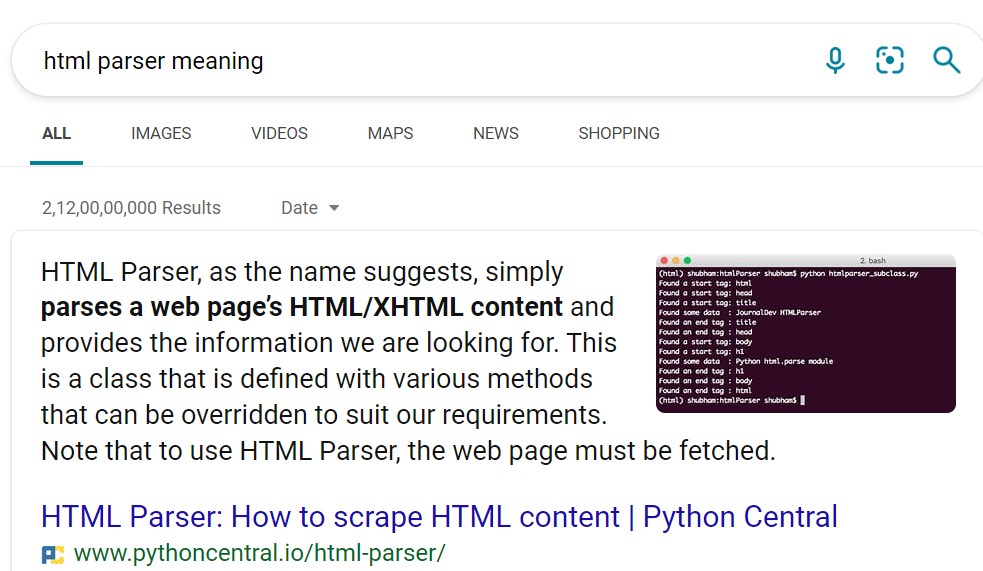

In [5]:
doc= bs(content,"html.parser") # Using beautyful soup parsing data from content to doc

## Step II finding Scrapable data by Tags

#### Using inspect element got tag of name of Lipstick

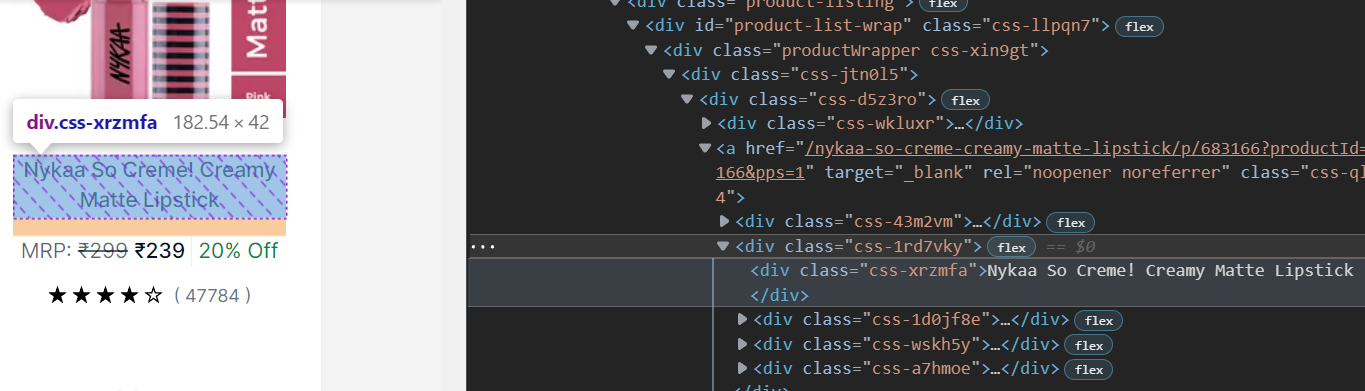

In [6]:
lipstick_name_tag=doc.find_all('div',{'class':"css-xrzmfa"}) # getting name tag
lipstick_name_tag[0].text

'Nykaa Matte Luxe Lipstick'

#### Using inspect element got tag of price of Lipstick

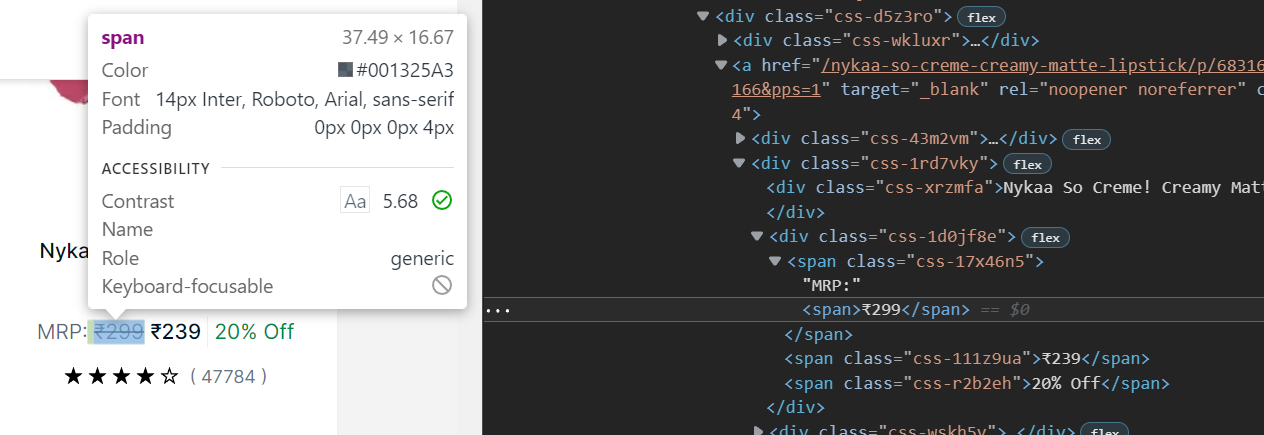

In [7]:
oprice_tag=doc.find_all('span',{'class':"css-17x46n5"})
op=oprice_tag[0].span.text
op

'₹799'

#### I am getting price as string with ₹ but I want it as integer.  So I am creating strtoint  function to get only int 

In [8]:
import re
def strtoint(string):
    '''strtoint(string:<class 'str'>)
    This function  gets digit from string and return it as integers '''
    r=re.compile('\d+')
    x=r.findall(string)
    if len(x)>0:
        return int(x[0])
    else:
        return 0
    
# oprice_tag=doc.find_all('span',{'class':"css-17x46n5"})
# op=oprice_tag[0].text
# map(int,op.split('₹')[1])
    
oprice_tag=doc.find_all('span',{'class':"css-17x46n5"})
op=oprice_tag[0].text
op
strtoint(op)

799

#### Getting Discounted price

In [9]:
dprice_tag=doc.find_all('span',{'class':"css-111z9ua"})
dp=dprice_tag[0].text
strtoint(dp) 

599

#### Getting Ratings by cutomers

In [10]:
ratings_tag=doc.find_all('span',{'class':"css-1j33oxj"})
rt=ratings_tag[0].text
strtoint(rt)

5435

## Step III Creating a dictionary to store all values in one place

In [11]:
Lipstick_details=[]
for name,op,dp,ratings in zip(lipstick_name_tag,oprice_tag,dprice_tag,ratings_tag):
    Lipstick_details.append({'Name of Lipstick':name.text,'Original Price ₹':strtoint(op.text),'Discounted Price ₹':strtoint(dp.text),'Total Ratings by customers':strtoint(ratings.text)})

In [12]:
Lipstick_details

[{'Name of Lipstick': 'Nykaa Matte Luxe Lipstick',
  'Original Price ₹': 799,
  'Discounted Price ₹': 599,
  'Total Ratings by customers': 5435},
 {'Name of Lipstick': 'Maybelline New York Color Sensational Ultimattes Lipstick',
  'Original Price ₹': 0,
  'Discounted Price ₹': 599,
  'Total Ratings by customers': 2271},
 {'Name of Lipstick': 'M.A.C Retro Matte Lipstick - Ruby Woo',
  'Original Price ₹': 0,
  'Discounted Price ₹': 1750,
  'Total Ratings by customers': 7245},
 {'Name of Lipstick': 'Lakme 9 To 5 Primer + Matte Lipstick',
  'Original Price ₹': 500,
  'Discounted Price ₹': 450,
  'Total Ratings by customers': 8403},
 {'Name of Lipstick': 'Huda Beauty Power Bullet Cream Glow Lipstick',
  'Original Price ₹': 0,
  'Discounted Price ₹': 1995,
  'Total Ratings by customers': 202},
 {'Name of Lipstick': "L'Oreal Paris Color Riche Moist Matte Lipstick",
  'Original Price ₹': 799,
  'Discounted Price ₹': 439,
  'Total Ratings by customers': 9674},
 {'Name of Lipstick': 'Kay Beauty 

## Step IV converting Lipstick_details to Data frame

In [13]:
Nykka_lipsticks=pd.DataFrame(Lipstick_details)
Nykka_lipsticks.head()

,Name of Lipstick,Original Price ₹,Discounted Price ₹,Total Ratings by customers
0,Nykaa Matte Luxe Lipstick,799,599,5435
1,Maybelline New York Color Sensational Ultimatt...,0,599,2271
2,M.A.C Retro Matte Lipstick - Ruby Woo,0,1750,7245
3,Lakme 9 To 5 Primer + Matte Lipstick,500,450,8403
4,Huda Beauty Power Bullet Cream Glow Lipstick,0,1995,202


#### Now original price have some missing value lets fix this

In [14]:
for i in range( len(Nykka_lipsticks['Original Price ₹'])):
    if Nykka_lipsticks['Original Price ₹'][i]==0:
        Nykka_lipsticks['Original Price ₹'][i]=Nykka_lipsticks['Original Price ₹'][i]+Nykka_lipsticks['Discounted Price ₹'][i]
        
Nykka_lipsticks

C:\Users\AKSHAY\AppData\Local\Temp/ipykernel_20100/2701137079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nykka_lipsticks['Original Price ₹'][i]=Nykka_lipsticks['Original Price ₹'][i]+Nykka_lipsticks['Discounted Price ₹'][i]


,Name of Lipstick,Original Price ₹,Discounted Price ₹,Total Ratings by customers
0,Nykaa Matte Luxe Lipstick,799,599,5435
1,Maybelline New York Color Sensational Ultimatt...,599,599,2271
2,M.A.C Retro Matte Lipstick - Ruby Woo,1750,1750,7245
3,Lakme 9 To 5 Primer + Matte Lipstick,500,450,8403
4,Huda Beauty Power Bullet Cream Glow Lipstick,1995,1995,202
5,L'Oreal Paris Color Riche Moist Matte Lipstick,799,439,9674
6,Kay Beauty Matte Drama Long Stay Lipstick,999,849,2942
7,Just Herbs Ayurvedic Matte Lipstick Micro-Mini...,575,575,8696
8,Nykaa So Creme! Creamy Matte Lipstick,299,239,51342
9,Maybelline New York Color Sensational Creamy M...,299,179,85346


## Step V Creating function to extract data from all pages

In [15]:
def get_page_contents(url):
    """
    This function takes url as input and return html page
    """
    response= requests.get(url)
    
    if response.status_code==200:
        docs= bs(response.text,'html.parser')
        return docs

def get_tags(doc):
    """
    This function takes html page as an input and extracts details about Lipsticks
    """
    name_tags= doc.find_all('div',{'class':"css-xrzmfa"})
    
    oprice_tags= doc.find_all('span',{'class':"css-17x46n5"})
    
    dprice_tags= doc.find_all('span',{'class':"css-111z9ua"})
    
    rating_tag=doc.find_all('span',{'class':"css-1j33oxj"})
        
    return name_tags,oprice_tags,dprice_tags,rating_tag

def form_dict(name_tags,oprice_tags,dprice_tags,rating_tag):
    """
    This function takes differents tags and creates a list of dictionaries out of it
    """
    Lipstick_details=[]
    for name,op,dp,ratings in zip(lipstick_name_tag,oprice_tag,dprice_tag,ratings_tag):
        Lipstick_details.append({'Name of Lipstick':name.text,
                             'Original Price ₹':strtoint(op.text),
                             'Discounted Price ₹':strtoint(dp.text),
                             'Total Ratings by Cusomers':strtoint(ratings.text)})
    return Lipstick_details

#     d=[]
    
#     for name,oprice,dprice,ratings in zip(name_tags,oprice_tags,dprice_tags,rating_tag):
#         d.append({'Lipstick Name':name.text,
#                  'Original Price':oprice.text.strip(),
#                   'Discounted price':dprice.text,
#                  'Ratings':ratings.text,})
#     return d

def create_df(*args):
    return pd.DataFrame(*args)


#Lets gets details of 300 pages of bikes

base_url='https://www.nykaa.com/makeup/lips/lipstick/c/249'

final_list=[]
for i in range(300):
    doc= get_page_contents(base_url+'/'+str(i))
    name,oprice,dprice,ratings= get_tags(doc)
    final_list+=form_dict(name,oprice,dprice,ratings)

df= create_df(final_list)

In [16]:
len(df)

6000

In [17]:
nykka_copy= df.copy() #creating copy

In [18]:
nykka_copy

,Name of Lipstick,Original Price ₹,Discounted Price ₹,Total Ratings by Cusomers
0,Nykaa Matte Luxe Lipstick,799,599,5435
1,Maybelline New York Color Sensational Ultimatt...,0,599,2271
2,M.A.C Retro Matte Lipstick - Ruby Woo,0,1750,7245
3,Lakme 9 To 5 Primer + Matte Lipstick,500,450,8403
4,Huda Beauty Power Bullet Cream Glow Lipstick,0,1995,202
...,...,...,...,...
5995,Love Earth Multipot Lip and Cheek Tint,0,599,4157
5996,Kay Beauty Matteinee Matte Lip Crayon Lipstick,799,679,13628
5997,Nykaa Ultra Matte Mini Lipstick,239,215,12588
5998,Lakme Absolute Matte Ultimate Lip Color with A...,800,640,11585


# Step VI Managing Data

#### Replacing missing values of Original Price ₹

In [19]:
for i in range( len(nykka_copy['Original Price ₹'])):

    if nykka_copy['Original Price ₹'][i]==0:
        nykka_copy['Original Price ₹'][i]=nykka_copy['Original Price ₹'][i]+nykka_copy['Discounted Price ₹'][i]
        


C:\Users\AKSHAY\AppData\Local\Temp/ipykernel_20100/289686311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nykka_copy['Original Price ₹'][i]=nykka_copy['Original Price ₹'][i]+nykka_copy['Discounted Price ₹'][i]


#### Insering new Ratings column for stars out of 5

In [20]:
nykka_copy.insert(loc=4, column='Star Ratings',value=0)

#### Calculating Discount percent from Original Price ₹ and Discounted Price ₹

In [21]:
nykka_copy['Discount %']=((nykka_copy['Original Price ₹']-nykka_copy['Discounted Price ₹'])*100/nykka_copy['Original Price ₹']).astype(int)

In [22]:
nykka_copy

,Name of Lipstick,Original Price ₹,Discounted Price ₹,Total Ratings by Cusomers,Star Ratings,Discount %
0,Nykaa Matte Luxe Lipstick,799,599,5435,0,25
1,Maybelline New York Color Sensational Ultimatt...,599,599,2271,0,0
2,M.A.C Retro Matte Lipstick - Ruby Woo,1750,1750,7245,0,0
3,Lakme 9 To 5 Primer + Matte Lipstick,500,450,8403,0,10
4,Huda Beauty Power Bullet Cream Glow Lipstick,1995,1995,202,0,0
...,...,...,...,...,...,...
5995,Love Earth Multipot Lip and Cheek Tint,599,599,4157,0,0
5996,Kay Beauty Matteinee Matte Lip Crayon Lipstick,799,679,13628,0,15
5997,Nykaa Ultra Matte Mini Lipstick,239,215,12588,0,10
5998,Lakme Absolute Matte Ultimate Lip Color with A...,800,640,11585,0,20


#### Calculating star Ratings by rating percent of Total Ratings by Cusomers

In [23]:
nykka_copy.loc[nykka_copy['Total Ratings by Cusomers']<int(nykka_copy['Total Ratings by Cusomers'].quantile(0.25)),'Star Ratings']  =1


nykka_copy.loc[nykka_copy['Total Ratings by Cusomers']>=int(nykka_copy['Total Ratings by Cusomers'].quantile(0.25)),'Star Ratings']  =2


nykka_copy.loc[nykka_copy['Total Ratings by Cusomers']>=int(nykka_copy['Total Ratings by Cusomers'].quantile(0.50)),'Star Ratings']  =3


nykka_copy.loc[nykka_copy['Total Ratings by Cusomers']>=int(nykka_copy['Total Ratings by Cusomers'].quantile(0.75)),'Star Ratings']  =4 
nykka_copy[nykka_copy['Total Ratings by Cusomers']>=21792]['Star Ratings']


8       4
9       4
10      4
13      4
28      4
       ..
5973    4
5988    4
5989    4
5990    4
5993    4
Name: Star Ratings, Length: 1200, dtype: int64

# Step VII Storing data

In [24]:
nykka_copy.to_csv('Nykka Final.csv', index=False)

In [25]:
nykka=pd.read_csv("C:\\Users\\AKSHAY\\Nykka Final.csv")
nykka

,Name of Lipstick,Original Price ₹,Discounted Price ₹,Total Ratings by Cusomers,Star Ratings,Discount %
0,Nykaa Matte Luxe Lipstick,799,599,5435,1,25
1,Maybelline New York Color Sensational Ultimatt...,599,599,2271,1,0
2,M.A.C Retro Matte Lipstick - Ruby Woo,1750,1750,7245,2,0
3,Lakme 9 To 5 Primer + Matte Lipstick,500,450,8403,2,10
4,Huda Beauty Power Bullet Cream Glow Lipstick,1995,1995,202,1,0
...,...,...,...,...,...,...
5995,Love Earth Multipot Lip and Cheek Tint,599,599,4157,1,0
5996,Kay Beauty Matteinee Matte Lip Crayon Lipstick,799,679,13628,3,15
5997,Nykaa Ultra Matte Mini Lipstick,239,215,12588,3,10
5998,Lakme Absolute Matte Ultimate Lip Color with A...,800,640,11585,3,20
